In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("hasilSurveyTPC.xlsx",sheet_name="Data Mentahan")

In [3]:
df.columns

Index(['Submission Date', 'Nama Lengkap', 'NIM', 'Program Studi', 'IPK',
       'Apakah Anda pernah mendengar istilah ChatGPT?',
       'Darimana Anda pernah mendengarnya?',
       'Apa yang Anda ketahui tentang ChatGPT?',
       'Apakah Anda pernah menggunakan ChatGPT dalam pembelajaran akademik?',
       'Dalam hal apa Anda menggunakan ChatGPT?',
       'Seberapa sering Anda menggunakan ChatGPT dalam pembelajaran akademik?',
       'Apakah ChatGPT membantu dalam pembelajaran akademik?',
       'Apakah Anda percaya dengan jawaban yang diberikan oleh ChatGPT?',
       'Seberapa sering Anda menemukan jawaban ChatGPT keliru?',
       'Bagaimana kemampuan ChatGPT dalam memahami konteks dari pertanyaan yang diajukan',
       'Saya tertarik untuk mengaplikasikan ChatGPT dalam pembelajaran akademik',
       'Apa yang Anda harapkan dari pengaplikasian ChatGPT dalam pembelajaran akademik?',
       'Bagaimana perasaan Anda terkait pengaplikasian ChatGPT sebagai bantuan dalam pembelajaran akadem

In [4]:
kolom_pertanyaan_terbuka = ["Apa yang Anda ketahui tentang ChatGPT?","Dalam menggunakan ChatGPT, apa yang membuat Anda merasa lebih antusias?","Dalam menggunakan ChatGPT, apa yang membuat Anda merasa lebih khawatir?"]
df = df[kolom_pertanyaan_terbuka]

In [5]:
from wordcloud import WordCloud

In [6]:
df.columns = ["ApaChatGPT","AlasanAntusias","AlasanKhawatir"]
df

,ApaChatGPT,AlasanAntusias,AlasanKhawatir
0,NaN,NaN,Semuanya akan bergantung dengan penggunaan Cha...
1,website yang mampu menjawab pertanyaan yang di...,NaN,NaN
2,program yang mampu menjawab berbagai pertanyaa...,NaN,NaN
3,ChatGPT merupakan website yang mampu membantu ...,NaN,NaN
4,ChatGPT merupakan aplikasi yang mengimplementa...,NaN,"Khawatir, karena banyak pekerjaan yang bisa di..."
...,...,...,...
86,NaN,NaN,NaN
87,chat bot AI,NaN,NaN
88,NaN,"Karena belum pernah mencobanya, tapi pernah de...",NaN
89,Platform dengan fitur AI yang bisa memberikan ...,Kemampuannya memberikan jawaban yang cukup ben...,NaN


In [7]:
long_teks = ' '.join(x for x in list(df['ApaChatGPT'].values) if type(x) == str)

In [8]:
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

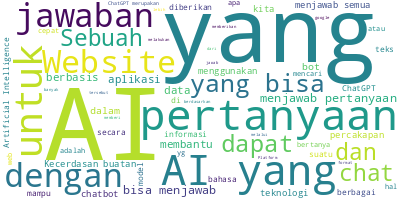

In [9]:
wordcloud.generate(long_teks)

wordcloud.to_image()

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/zafin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')

In [19]:
def remove_stopwords(x):
    if type(x) != str:
        return x
    else:
        return " ".join([word for word in x.split() if word not in (stop)])

In [20]:
df['ApaChatGPTnoStopWord'] = df['ApaChatGPT'].apply(remove_stopwords)

In [21]:
df

,ApaChatGPT,AlasanAntusias,AlasanKhawatir,ApaChatGPTnoStopWord
0,NaN,NaN,Semuanya akan bergantung dengan penggunaan Cha...,NaN
1,website yang mampu menjawab pertanyaan yang di...,NaN,NaN,website
2,program yang mampu menjawab berbagai pertanyaa...,NaN,NaN,program berdasarkan model
3,ChatGPT merupakan website yang mampu membantu ...,NaN,NaN,ChatGPT website membantu
4,ChatGPT merupakan aplikasi yang mengimplementa...,NaN,"Khawatir, karena banyak pekerjaan yang bisa di...",ChatGPT aplikasi mengimplementasikan model mac...
...,...,...,...,...
86,NaN,NaN,NaN,NaN
87,chat bot AI,NaN,NaN,chat bot AI
88,NaN,"Karena belum pernah mencobanya, tapi pernah de...",NaN,NaN
89,Platform dengan fitur AI yang bisa memberikan ...,Kemampuannya memberikan jawaban yang cukup ben...,NaN,Platform fitur AI informasi apapun


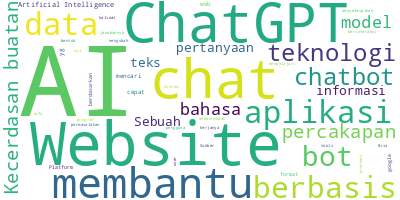

In [22]:
long_teks = ' '.join(x for x in list(df['ApaChatGPTnoStopWord'].values) if type(x) == str)
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_teks)
wordcloud.to_image()

In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [24]:
def stemming(x):
    if type(x) != str:
        return x
    else:
        text = [stemmer.stem(word) for word in x.split()]
        return " ".join(text)

In [25]:
df["ApaChatGPTnoStopWordStem"] = df["ApaChatGPTnoStopWord"].apply(stemming)

In [26]:
df

,ApaChatGPT,AlasanAntusias,AlasanKhawatir,ApaChatGPTnoStopWord,ApaChatGPTnoStopWordStem
0,NaN,NaN,Semuanya akan bergantung dengan penggunaan Cha...,NaN,NaN
1,website yang mampu menjawab pertanyaan yang di...,NaN,NaN,website,website
2,program yang mampu menjawab berbagai pertanyaa...,NaN,NaN,program berdasarkan model,program dasar model
3,ChatGPT merupakan website yang mampu membantu ...,NaN,NaN,ChatGPT website membantu,chatgpt website bantu
4,ChatGPT merupakan aplikasi yang mengimplementa...,NaN,"Khawatir, karena banyak pekerjaan yang bisa di...",ChatGPT aplikasi mengimplementasikan model mac...,chatgpt aplikasi implementasi model machine le...
...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN
87,chat bot AI,NaN,NaN,chat bot AI,chat bot ai
88,NaN,"Karena belum pernah mencobanya, tapi pernah de...",NaN,NaN,NaN
89,Platform dengan fitur AI yang bisa memberikan ...,Kemampuannya memberikan jawaban yang cukup ben...,NaN,Platform fitur AI informasi apapun,platform fitur ai informasi apa


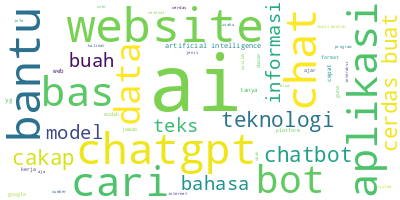

In [27]:
long_teks = ' '.join(x for x in list(df['ApaChatGPTnoStopWordStem'].values) if type(x) == str)
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_teks)
wordcloud.to_image()

In [28]:
df['AlasanAntusiasnoStopWord'] = df['AlasanAntusias'].apply(remove_stopwords)
df["AlasanAntusiasnoStopWordStem"] = df["AlasanAntusiasnoStopWord"].apply(stemming)

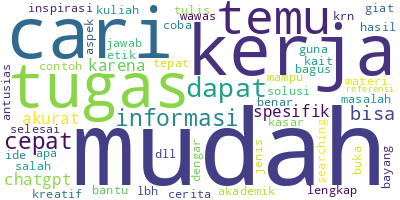

In [29]:
long_teks = ' '.join(x for x in list(df['AlasanAntusiasnoStopWordStem'].values) if type(x) == str)
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_teks)
wordcloud.to_image()

In [30]:
df['AlasanKhawatirnoStopWord'] = df['AlasanKhawatir'].apply(remove_stopwords)
df["AlasanKhawatirnoStopWordStem"] = df["AlasanKhawatirnoStopWord"].apply(stemming)

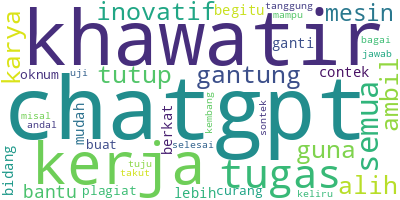

In [31]:
long_teks = ' '.join(x for x in list(df['AlasanKhawatirnoStopWordStem'].values) if type(x) == str)
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_teks)
wordcloud.to_image()